# Data visualization

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mi = gpd.read_file('milano.shp')
edicole = pd.read_csv('~/Desktop/Project/infoMilano/ds57_economia_edicole__final.csv', sep=';')
local = pd.read_csv('~/Desktop/Project/infoMilano/economia_esercizi_vicinato_sede_fissa_coord.csv', sep=';')
spettacolo = pd.read_csv('~/Desktop/Project/infoMilano/economia_locale_pubblico_spettacolo_coord.csv', sep=';')
grandi = pd.read_csv('~/Desktop/Project/infoMilano/economia_media_grande_distribuzione_coord.csv', sep=';')
pane = pd.read_csv('~/Desktop/Project/infoMilano/economia_panificatori_coord.csv', sep=';')
beauty = pd.read_csv('~/Desktop/Project/infoMilano/economia_parrucchieri_estetisti_centri_abbronzatura_coord.csv', sep=';')
fuoriPiano =pd.read_csv('~/Desktop/Project/infoMilano/economia_pubblici_esercizi_fuori_piano_2018_coord.csv', sep=';')
inPiano =pd.read_csv('~/Desktop/Project/infoMilano/economia_pubblici_esercizi_in_piano_coord.csv', sep=';')

First, I would like to recall the choropleth map of the rent values (per square meter) divided by neighborhood in the city of Milan, as shown in the data preparation part.

[]

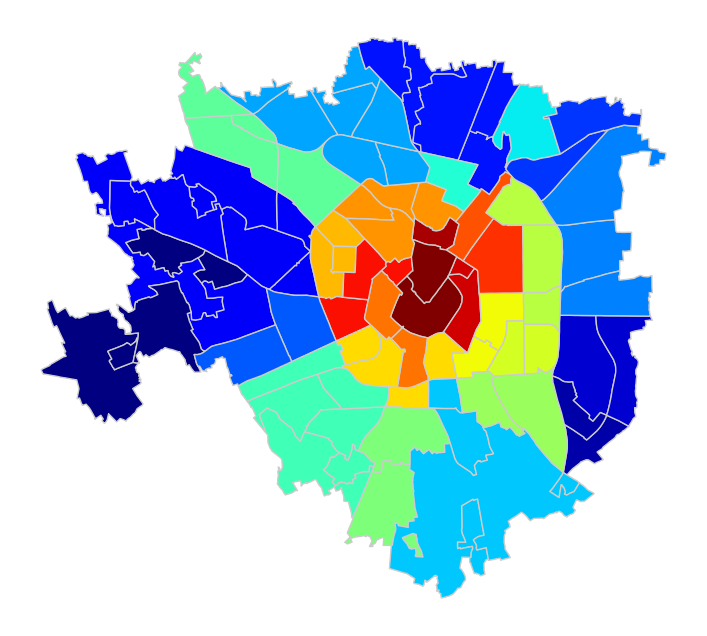

In [11]:
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
mi.plot(column='Rent', ax=ax, edgecolor='0.8', linewidth=1, cmap='jet')

plt.plot()

After having imported all the required packages and CSVs, retrieved from the Milano Open Data portal, some data visualization is performed. First, I visualize all the businesses on the territory of the city, to investigate if there is some visual suggestions about the high prices of the city center, other than the fact that it is a central position.

[]

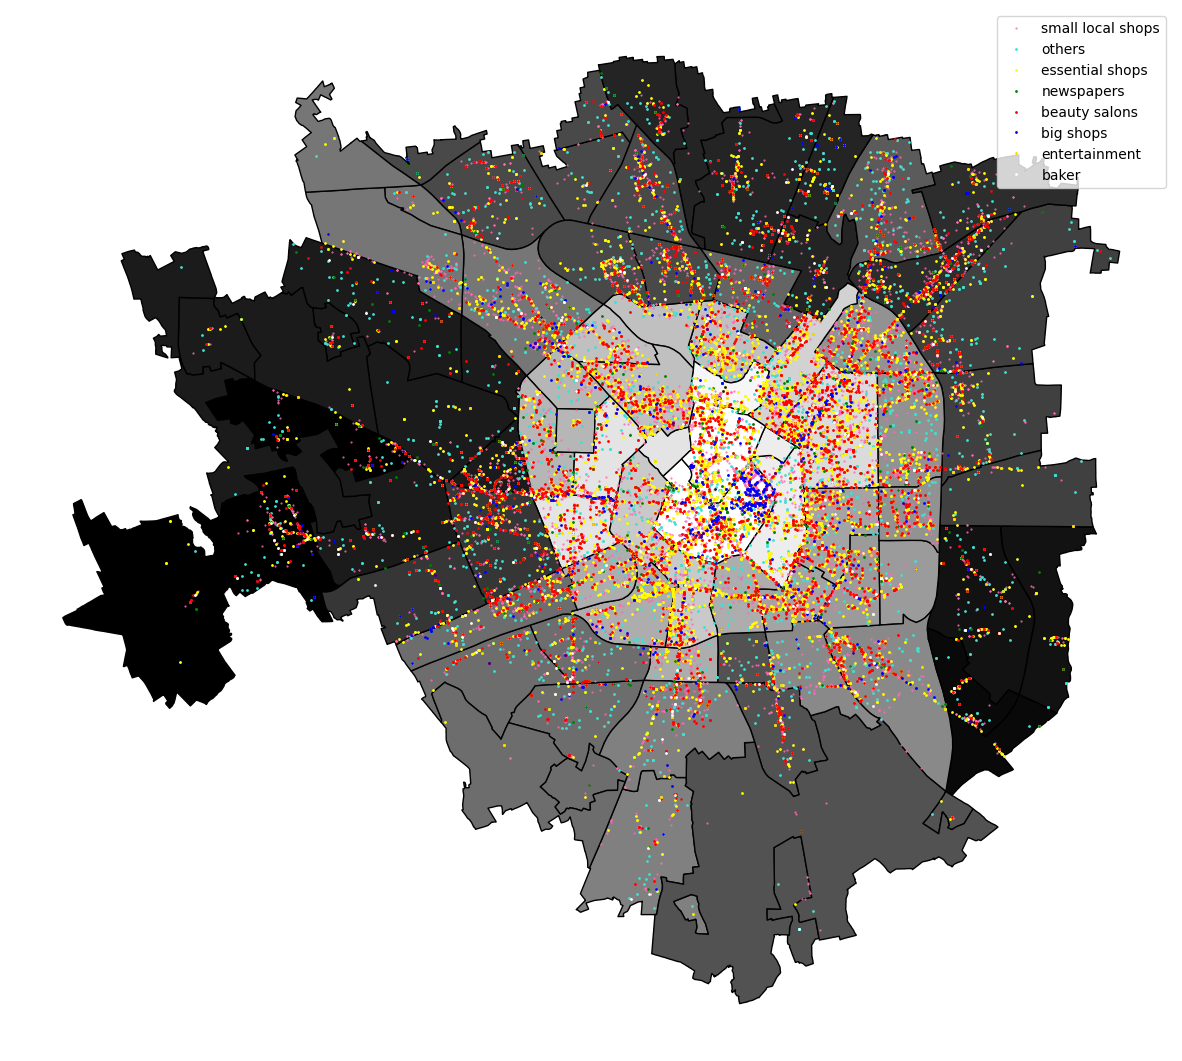

In [5]:
base = mi.plot(column = 'Rent', cmap='gray', edgecolor='black', figsize=(15,15))
local.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=0.5, c = 'hotpink', label='small local shops')
fuoriPiano.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'turquoise', label='others')
inPiano.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'yellow', label='essential shops')
edicole.plot(ax = base, x = 'LONG_X_4326', y= 'LAT_Y_4326',linestyle="" ,marker='o', markersize=1, c = 'green', label='newspapers')
beauty.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'red', label='beauty salons')
grandi.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'blue', label='big shops')
spettacolo.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'gold', label='entertainment')
pane.plot(ax = base, x = 'LONG_WGS84', y= 'LAT_WGS84',linestyle="" ,marker='o', markersize=1, c = 'white', label='baker')
plt.axis('off')
plt.plot()

As can be seen, the city center (including areas such that Duomo and Brera) are very well served by a varied amount of services. So they high prices are not only influenced by the position, but also by the quantity of services. It can be noticed that the big shops and the entertainment locations are present only in central areas, with few exceptions.

Instead, the areas neighboring the center have availability of services only in the main roads of the city, whose shape can be guessed by the distribution of the points. This means that some roads might have higher prices in rent, due to being better served by shops, while some lower, which turns the average to a lower price.


In the following plots, the scatterplot can show the intensity of the presence of three different kind of services.

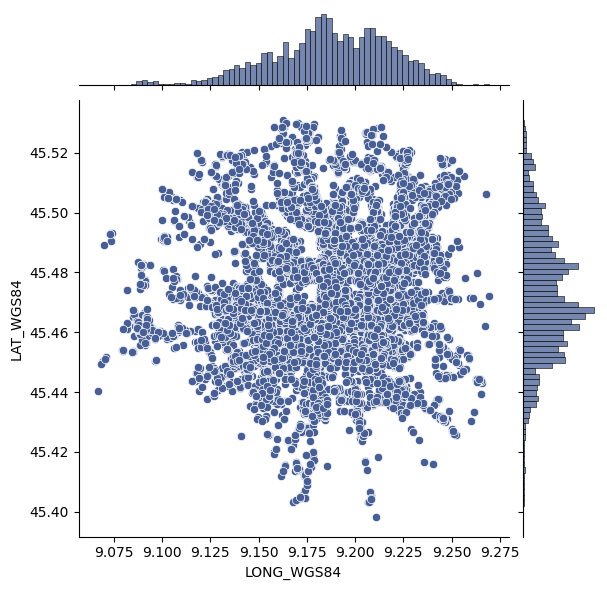

In [6]:
import seaborn as sns

sns.jointplot(x='LONG_WGS84', y='LAT_WGS84', color="xkcd:dusky blue", data=local)

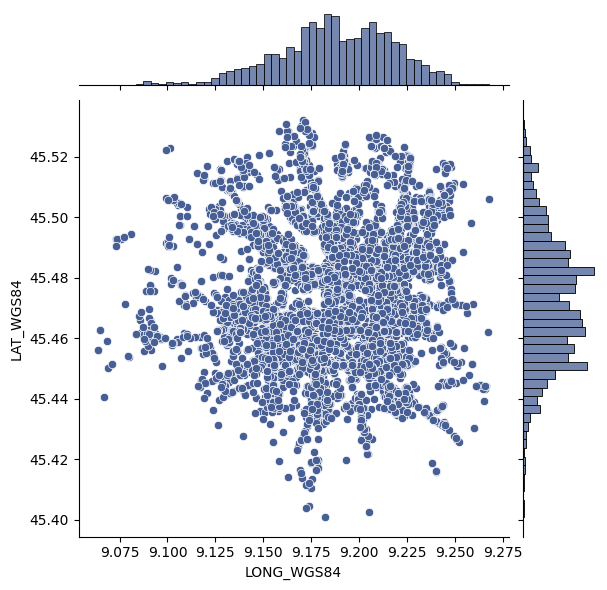

In [7]:
sns.jointplot(x='LONG_WGS84', y='LAT_WGS84', color="xkcd:dusky blue", data=inPiano)

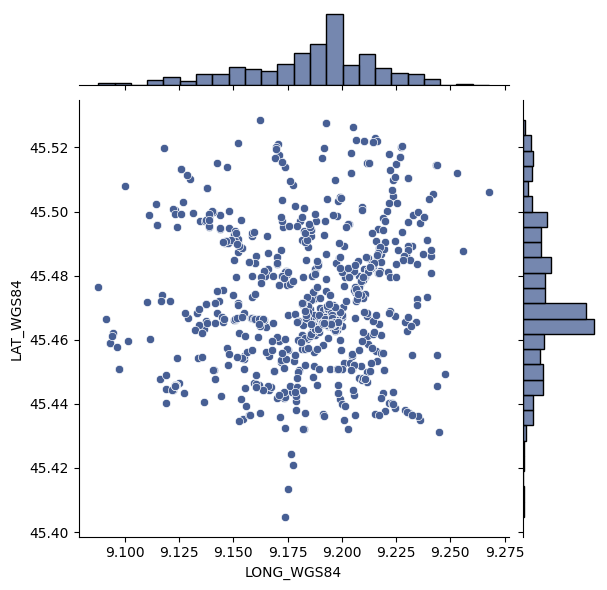

In [8]:
sns.jointplot(x='LONG_WGS84', y='LAT_WGS84', color="xkcd:dusky blue", data=grandi)

As can be seen, the most points are clustered on the center. However, a little detail is that the central part of the histograms is not always at its peak, but the two areas right north and south of it. This might suggest that the city is not developing in the central-west and central-east areas (the most rural), but they are developing towards north and south (that is, towards other closer cities like Pavia in the south and Varese or Switzerland in the north).